In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

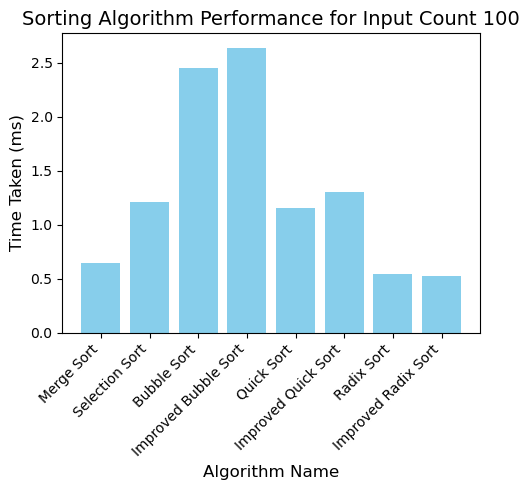

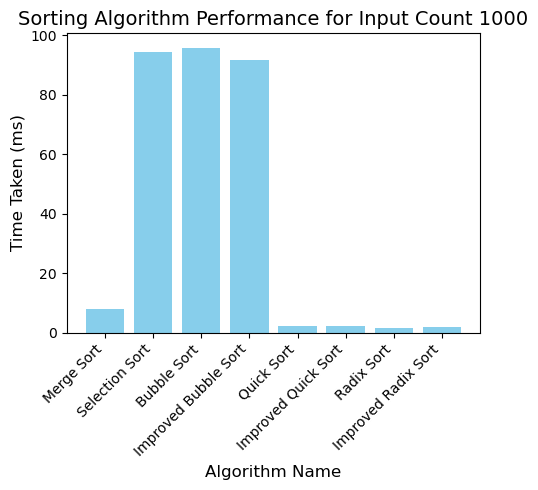

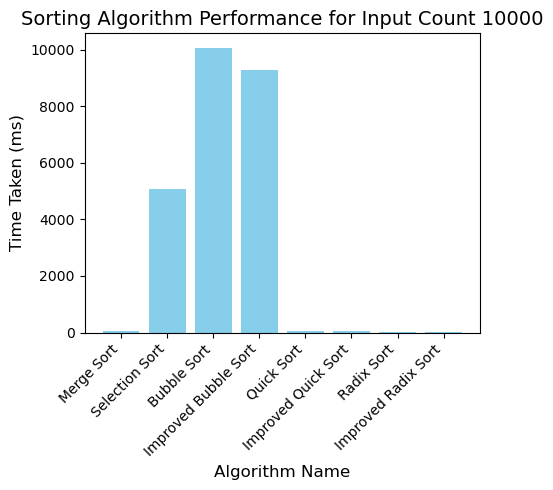

In [2]:
def remove_prefix(df, prefix):
    df["Algorithm Name"] = df["Algorithm Name"].str.replace(f"^{prefix}", "", regex=True)
    return df
# Create a DataFrame
df = pd.read_csv("results.csv")
df = remove_prefix(df, "Sorted ")
# Separate data by input count
input_counts = df["Input Count"].unique()

# Plot results for each input count
for count in input_counts:
    subset = df[df["Input Count"] == count]
    plt.figure(figsize=(5, 5))
    plt.bar(subset["Algorithm Name"], subset["Time Taken (ms)"], color="skyblue")
    plt.title(f"Sorting Algorithm Performance for Input Count {count}", fontsize=14)
    plt.xlabel("Algorithm Name", fontsize=12)
    plt.ylabel("Time Taken (ms)", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


C:\Users\ng822\AppData\Local\Temp\ipykernel_23824\71189353.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted_df["Sorted"] = 1
C:\Users\ng822\AppData\Local\Temp\ipykernel_23824\71189353.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  improved_df['Improved'] = 1


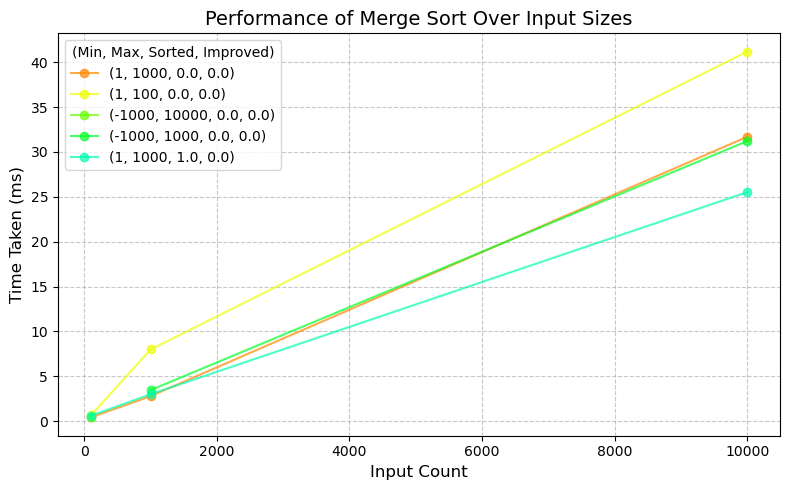

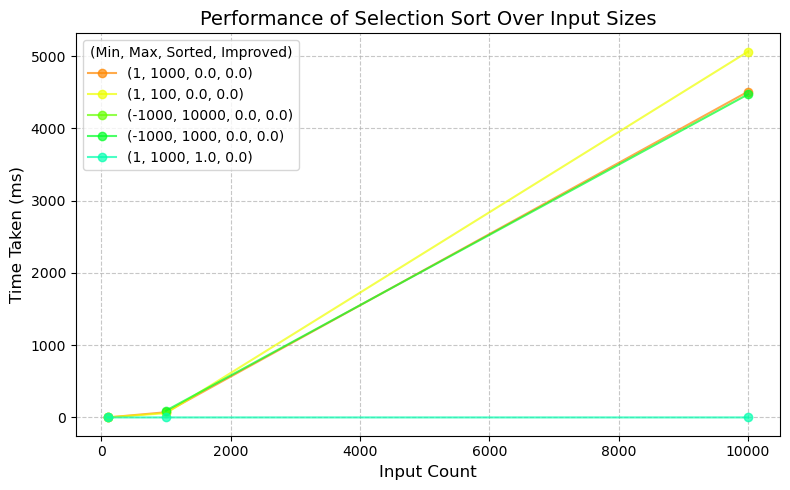

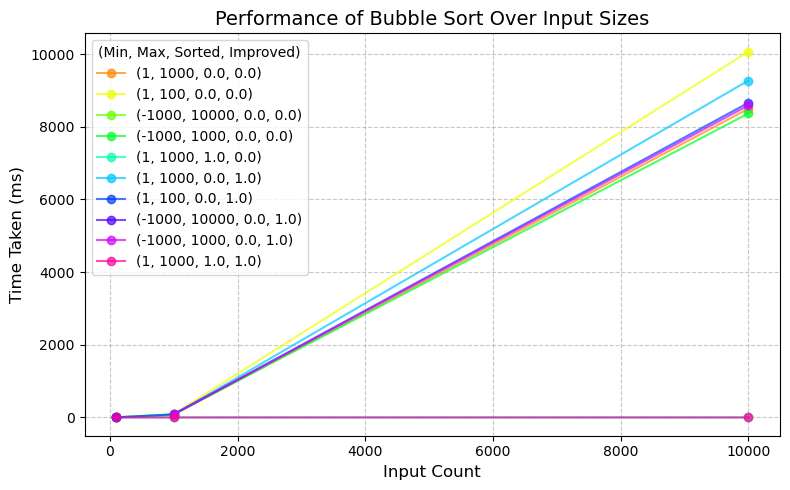

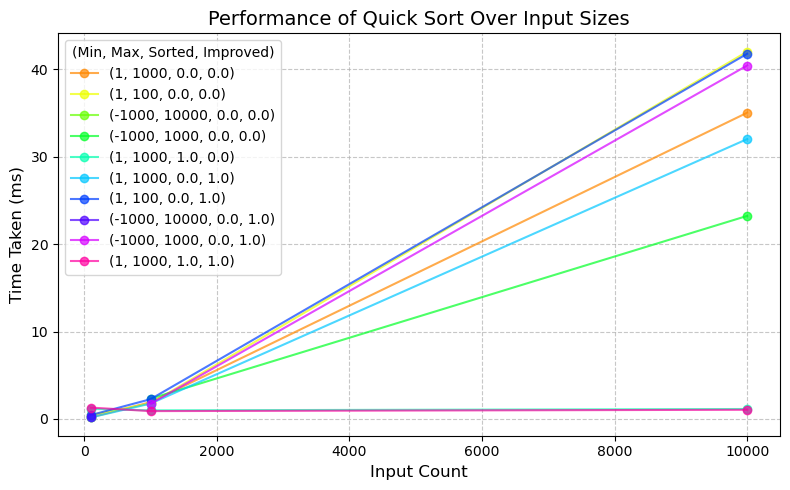

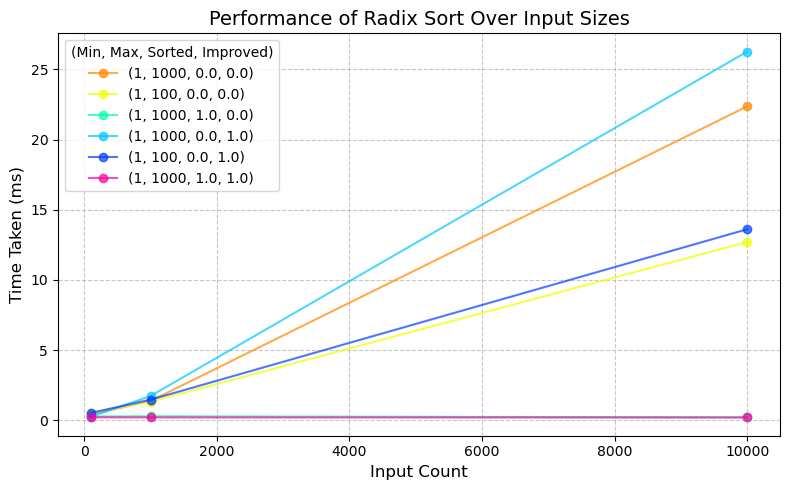

In [3]:
# Load data from CSV
df = pd.read_csv("results.csv")

# Filter out algorithms whose names start with "Sorted"
sorted_df = df[df["Algorithm Name"].str.startswith("Sorted ", na=False)]
sorted_df["Sorted"] = 1
df = df[~df["Algorithm Name"].str.startswith("Sorted", na=False)]
df = pd.concat([df, sorted_df])
df = remove_prefix(df, "Sorted ")

# Handle "Improved" algorithms
improved_df = df[df["Algorithm Name"].str.startswith("Improved ", na=False)]
improved_df['Improved'] = 1
df = df[~df["Algorithm Name"].str.startswith("Improved", na=False)]

# Strip "Improved" prefix from algorithm names
improved_df["Algorithm Name"] = improved_df["Algorithm Name"].str.lstrip("Improved ")

# Combine filtered and improved data
df = pd.concat([df, improved_df])

# Fill missing values with 0
df = df.fillna(0)


df = remove_prefix(df, "Improved ")

# Create a new column for the input range group (Min, Max, Sorted, Improved)
df["Range Group"] = df.apply(lambda row: f"({row['Min']}, {row['Max']}, {row['Sorted']}, {row['Improved']})", axis=1)

# Unique algorithm names
algorithms = df["Algorithm Name"].unique()

# Unique range groups
range_groups = df["Range Group"].unique()

# Create color palette for range groups with more distinct colors
color_palette = sns.color_palette("hsv", len(range_groups))
range_colors = {range_group: color_palette[i] for i, range_group in enumerate(range_groups)}

# Define a special, darker color for "Improved" algorithms
improved_color = sns.color_palette("dark", as_cmap=True)[1]

# Plot performance trends for each algorithm, colored by range group
for algorithm in algorithms:
    # Extract data for the current algorithm
    subset = df[df["Algorithm Name"] == algorithm]

    # Create the plot
    plt.figure(figsize=(8, 5))
    for range_group in subset["Range Group"].unique():
        range_subset = subset[subset["Range Group"] == range_group]
        if not range_subset.empty:
            min_val = range_subset["Min"].iloc[0]
            max_val = range_subset["Max"].iloc[0]
            sorted_val = range_subset["Sorted"].iloc[0]
            improved_val = range_subset["Improved"].iloc[0]
            
            color = range_colors[range_group] if not algorithm.startswith("Improved") else improved_color
            marker = 'o' if not algorithm.startswith("Improved") else 's'

            plt.plot(
                range_subset["Input Count"], 
                range_subset["Time Taken (ms)"], 
                marker=marker, 
                label=range_group,
                color=color,
                alpha=0.7  # Adjust opacity for clarity
            )

    # Customize the plot
    plt.title(f"Performance of {algorithm} Over Input Sizes", fontsize=14)
    plt.xlabel("Input Count", fontsize=12)
    plt.ylabel("Time Taken (ms)", fontsize=12)
    plt.legend(title="(Min, Max, Sorted, Improved)", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

